In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d sumn2u/riped-and-unriped-tomato-dataset

Dataset URL: https://www.kaggle.com/datasets/sumn2u/riped-and-unriped-tomato-dataset
License(s): CC-BY-SA-4.0
 94% 104M/110M [00:01<00:00, 64.6MB/s] 
100% 110M/110M [00:01<00:00, 63.5MB/s]


In [ ]:
!unzip /content/riped-and-unriped-tomato-dataset.zip

Archive:  /content/riped-and-unriped-tomato-dataset.zip
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_1.jpeg  
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_10.jpeg  
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_11.jpeg  
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_12.jpeg  
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_13.jpeg  
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_14.jpeg  
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_15.jpeg  
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_16.jpeg  
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_17.jpeg  
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_18.jpeg  
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_19.jpeg  
  inflating: Riped and Unriped Tomato Dataset/Images/riped_tomato_2.jpeg  
  inflating: Riped and Unriped Tom

In [ ]:
# prompt: read images from /content/Riped and Unriped Tomato Dataset/Images where riped_tomato_n.jpeg is class 1 and unriped_tomato_n.jpeg is class 0 using PIL

from PIL import Image
import os
import numpy as np
X = []
y = []
path = '/content/Riped and Unriped Tomato Dataset/Images'
for filename in os.listdir(path):
  if(filename.endswith('.jpeg')):
    if filename.startswith('riped'):
      y.append(1)
    elif filename.startswith('unriped'):
      y.append(0)

    img = np.array(Image.open(os.path.join(path,filename)).convert("RGB").resize((224,224)))
    Tmp = np.zeros_like(img);
    Tmp[:,:,1] = 125
    X.append(img+Tmp)

X = np.array(X)
y = np.array(y)

In [ ]:
import matplotlib.pyplot as plt

Tmp = np.zeros_like(X[0]);
Tmp[:,:,1] = 125
plt.imshow(X[0])
print(y[0])

1


In [ ]:
# prompt: plot some samples

plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X[i])
  plt.xlabel(y[i])


In [ ]:
# prompt: plot some samples

plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X[i])
  plt.xlabel(y[i])


In [ ]:
# prompt: bar plot y

import matplotlib.pyplot as plt

plt.bar(['Unriped', 'Riped'], [np.sum(y==0), np.sum(y==1)])
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from tensorflow.keras.applications import ResNet50,ResNet152, ResNet152V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy

# Load the ResNet50 model with pre-trained weights
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Freeze the convolutional layers in the base model
base_model.trainable = False

# Build the new model
model = Sequential()
model.add(base_model)
model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(1024, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


242900224/242900224 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 124s 21s/step - accuracy: 0.5444 - loss: 0.6933 - val_accuracy: 0.5833 - val_loss: 0.6912
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 133s 19s/step - accuracy: 0.5116 - loss: 0.6926 - val_accuracy: 0.5833 - val_loss: 0.6908
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 142s 19s/step - accuracy: 0.4993 - loss: 0.6913 - val_accuracy: 0.5833 - val_loss: 0.6904
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 141s 18s/step - accuracy: 0.5911 - loss: 0.6909 - val_accuracy: 0.5833 - val_loss: 0.6899
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 144s 19s/step - accuracy: 0.5771 - loss: 0.6906 - val_accuracy: 0.5278 - val_loss: 0.6896
Epoch 6/10


KeyboardInterrupt: 

In [ ]:
# prompt: create a cnn model to predict

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4945 - loss: 16545.5547 - val_accuracy: 0.4722 - val_loss: 18278.7812
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6476 - loss: 9272.6836 - val_accuracy: 0.6389 - val_loss: 4330.6035
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7810 - loss: 2071.4907 - val_accuracy: 0.5556 - val_loss: 5571.3691
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 992ms/step - accuracy: 0.7122 - loss: 2618.9463 - val_accuracy: 0.8333 - val_loss: 664.9293
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8708 - loss: 949.7285 - val_accuracy: 0.8889 - val_loss: 1127.3306
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 916ms/step - accuracy: 0.9145 - loss: 451.2032 - val_accuracy: 0.8333 - val_loss: 538.6215
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9483 - loss: 286.1649 - val_accuracy: 0.7778 - val_loss: 832.1204
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 921ms/step - accuracy: 0.9658 - loss: 429.2801 - val_a

2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 10s/step


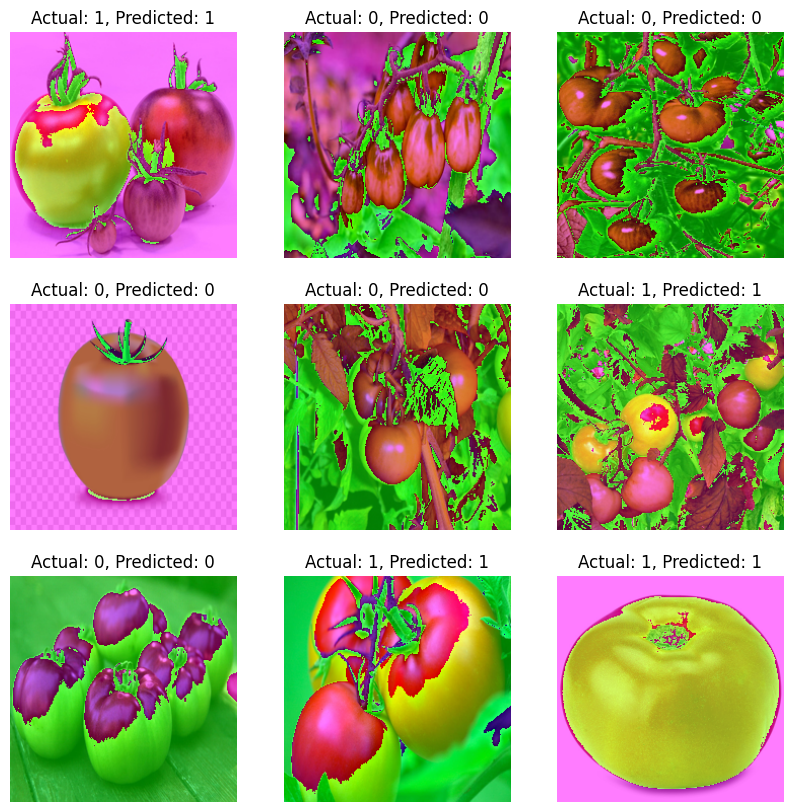

In [ ]:


# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot 3x3 test cases
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(X_test[i])
  plt.title(f"Actual: {y_test[i]}, Predicted: {y_pred_classes[i]}")
  plt.axis('off')
plt.show()


In [ ]:
# Plot 3x3 test cases

Tmp = np.zeros_like(X[0]);
Tmp[:,:,1] = 125

plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(X_test[i]-Tmp)
  plt.title(f"Actual: {y_test[i]}, Predicted: {y_pred_classes[i]}")
  plt.axis('off')
plt.show()


In [ ]:
# prompt: plot loss curve

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# prompt: plot accuracy curve

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step


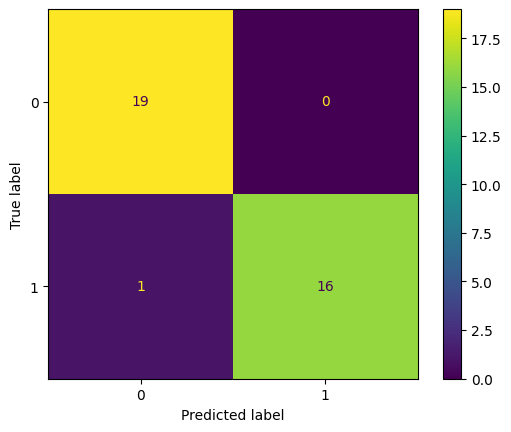

In [ ]:
# prompt: predict and plot the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
